# Natural Language Processing Workshop :
# Analyzing wine descriptions, rating, variety and predicting price
<img src="https://secure.meetupstatic.com/photos/event/8/4/9/0/highres_485793936.jpeg">


References & additional reading material: https://towardsdatascience.com/generating-wine-recommendations-using-the-universal-sentence-encoder-d086edd13d00, https://www.kaggle.com/zynicide/wine-reviews, https://nlp.stanford.edu/projects/glove/, https://towardsdatascience.com/predicting-wine-quality-using-text-reviews-8bddaeb5285d, https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03, https://www.kaggle.com/jellyfish0821/wine-reviews-machine-learning-pipeline

### 1: Getting Started : Importing & cleaning data


 For the first part we will be reading the data, some basic exploration and cleaning. During this process we will also try to determine the quality of our data and decide on how to proceed with our data analysis.

In [1]:
# Pandas is an open source Python library that offers data structures and data analysis tools and operations. Read more at: https://pandas.pydata.org/
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First we start by importing the data
wine_reviews = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")


In [3]:
# Check how large is our dataframe 
wine_reviews.shape

(129971, 14)

In [4]:
#Show the first 5 rows of the dataframe
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
#checking the last two rows
wine_reviews.iloc[-2:]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit



From a brief overview of our data we can start by taking some steps in dropping columns that do not interest us and duplicated rows. For this exercice we decided to drop the columns of designation, region1, region2 as well as the twitter handle of the reviewer. The exta column unmnamed:0 is also dropped as this is replaced by the index.


In [6]:
#drop columns designation, region1, region2 and taster twitter details.
wine_df = wine_reviews.drop(columns=['designation','region_1', 'region_2', 'taster_twitter_handle', 'winery','Unnamed: 0' ])

In [7]:
wine_df.shape

(129971, 8)

In [8]:
#drop duplicate description
wine_df = wine_df.drop_duplicates('description')

In [9]:
wine_df.shape

(119955, 8)

In [10]:
#drop rows with NaN price, points and description
wine_df = wine_df.dropna(subset=['price', 'points', 'description'])
wine_df.shape

(111567, 8)

In [11]:
print(wine_df['description'].groupby(wine_df['taster_name']).count().sort_values(ascending = False))

taster_name
Roger Voss            18543
Michael Schachner     13870
Kerin O’Keefe          8872
Paul Gregutt           8837
Virginie Boone         8681
Matt Kettmann          5642
Joe Czerwinski         4643
Sean P. Sullivan       4422
Anna Lee C. Iijima     3974
Jim Gordon             3761
Anne Krebiehl MW       3035
Lauren Buzzeo          1582
Susan Kostrzewa        1010
Mike DeSimone           452
Jeff Jenssen            436
Alexander Peartree      381
Carrie Dykes            128
Fiona Adams              24
Christina Pickard         6
Name: description, dtype: int64


In [12]:
print(wine_df['description'].groupby(wine_df['country']).count().sort_values(ascending = False))

country
US                        50229
France                    16286
Italy                     15492
Spain                      6049
Portugal                   4502
Chile                      4130
Argentina                  3500
Austria                    2535
Australia                  2169
Germany                    1951
New Zealand                1240
South Africa               1195
Israel                      453
Greece                      426
Canada                      224
Bulgaria                    132
Hungary                     128
Romania                     102
Uruguay                      98
Turkey                       81
Georgia                      74
Slovenia                     70
Croatia                      68
Mexico                       68
England                      59
Moldova                      56
Brazil                       44
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14


In [13]:
# how many varieties
varieties = wine_df.variety.value_counts()
varieties = varieties.to_frame('count').reset_index()
varieties.columns = ['variety', 'reviews']
varieties.shape


(697, 2)

In [14]:
#Of the 697 grape varieties represented in this dataset 60 have 90% of all reviews. So we will drop varieties with less than 185 reviews.
print(wine_df.variety.value_counts().head(60))

Pinot Noir                       11834
Chardonnay                       10237
Cabernet Sauvignon                8760
Red Blend                         7805
Bordeaux-style Red Blend          4958
Riesling                          4572
Sauvignon Blanc                   4402
Syrah                             3776
Rosé                              2951
Merlot                            2855
Zinfandel                         2524
Malbec                            2391
Sangiovese                        2161
Nebbiolo                          2155
Portuguese Red                    2028
White Blend                       2004
Sparkling Blend                   1849
Tempranillo                       1651
Rhône-style Red Blend             1283
Pinot Gris                        1268
Cabernet Franc                    1196
Champagne Blend                   1134
Grüner Veltliner                  1018
Pinot Grigio                       934
Viognier                           911
Portuguese White         

In [15]:
wines1 = wine_df.merge(varieties, on="variety", how='left')
wines = wines1[wines1['reviews'] >= 185]
wines.head(10)

,country,description,points,price,province,taster_name,title,variety,reviews
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,2028.0
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,1268.0
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,4572.0
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,11834.0
6,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,886.0
7,Germany,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,886.0
8,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,1268.0
9,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,8760.0
10,France,"This is a dry wine, very spicy, with a tight, ...",87,30.0,Alsace,Roger Voss,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,886.0
11,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,8760.0


In [16]:
# double check we have all unique 60 varieties
wines.variety.nunique()

60

### Part 2: Exploratory Data Analysis & Visualization 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

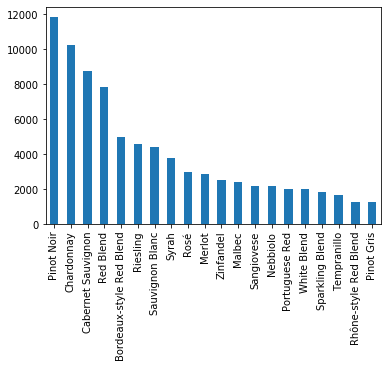

In [18]:
wines['variety'].value_counts().head(20).plot.bar()


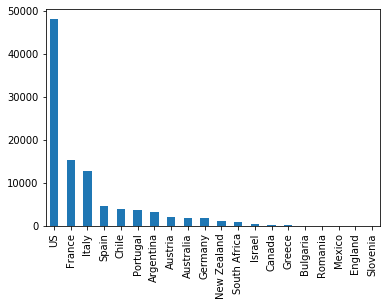

In [19]:
wines['country'].value_counts().head(20).plot.bar()

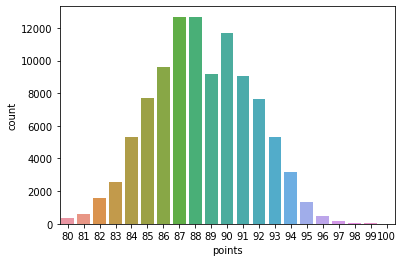

In [20]:
# Score distrubution (Every wine gets a score between 80 and 100)
sns.countplot(wines['points'])

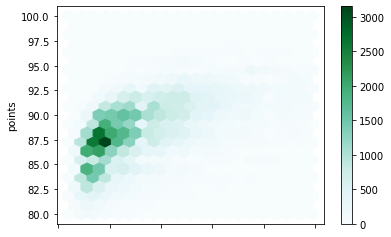

In [21]:
# Hexplot
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
from scipy.stats import kurtosis, skew 
from scipy import stats
wines[wines['price'] < 100].plot.hexbin(x="price", y="points", gridsize=20)

In [22]:
#!pip install plotnine
from plotnine import *

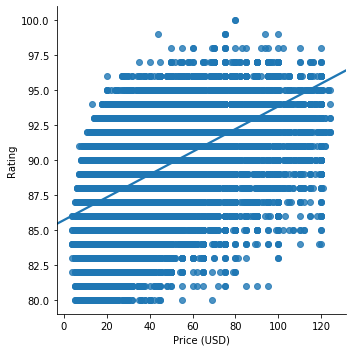

In [23]:
prices_by_variety = wines[["price", "variety"]].dropna()
ratings_by_price = wines[["price", "points"]]

# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]

ax = sns.lmplot(x = "price", y = "points", data = ratings_by_price)


ax.set(xlabel = "Price (USD)", ylabel = "Rating")

plt.show()

In [24]:
# Is there a relationship between wine price and variety?
wines_per_variety = wines[wines['variety'].isin(wines['variety'].value_counts().head(5).index)].dropna()
# Remove all data greater than the 98th percentile
val = wines_per_variety["price"].quantile(0.98)
wines_per_variety = wines_per_variety[wines_per_variety["price"] < val]

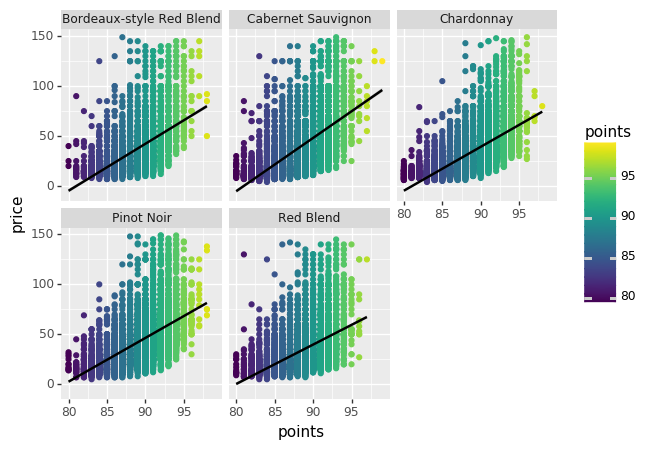

<ggplot: (-9223371952470468436)>

In [25]:
# Remove all data greater than the 98th percentile
val = prices_by_variety["price"].quantile(0.98)
ratings_by_price = ratings_by_price[ratings_by_price["price"] < val]

(ggplot(wines_per_variety)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)


### Part 3 : Predicting Wine Variety from Text Reviews (1 feature)


In [26]:
#At this point we can choose which and how many features we like to go with. 
#We will start by only using the description

#Let's start with TfidfVectorizer with no text pre-processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [27]:
wines = wines.dropna()

In [28]:
#Below are a set of libraries that can be used, we recommend to only install spacy for now
#!pip install nltk
#!pip install spacy
#!python -m spacy download en
#!pip install wordcloud
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [29]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [30]:
# We will update the stop words that we want to be removed from the review description. These include any ferenece to the grape variety we are trying to predict and also colour reference.
# We check also for both lower and upper case sentences.
grape_variety = wines.variety.unique().tolist()
grape_variety_lc = [x.lower() for x in grape_variety]
grape_variety_broken = [i.replace('-', ' ').replace(',', ' ').split(' ') for i in grape_variety_lc]
grape_variety_broken = [item for sublist in grape_variety_broken for item in sublist]
grape_variety_broken.remove('red')
grape_variety_broken.remove('white')

In [31]:
stop_words.update(grape_variety,grape_variety_lc,grape_variety_broken)
stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'Aglianico',
 'Albariño',
 'Barbera',
 'Blaufränkisch',
 'Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Cabernet Franc',
 'Cabernet Sauvignon',
 'Carmenère',
 'Champagne Blend',
 'Chardonnay',
 'Chenin Blanc',
 'Gamay',
 'Garganega',
 'Garnacha',
 'Gewürztraminer',
 'Glera',
 'Grenache',
 'Grüner Veltliner',
 'Malbec',
 'Melon',
 'Meritage',
 'Merlot',
 'Montepulciano',
 'Moscato',
 'Mourvèdre',
 'Nebbiolo',
 "Nero d'Avola",
 'Petit Verdot',
 'Petite Sirah',
 'Pinot Blanc',
 'Pinot Grigio',
 'Pinot Gris',
 'Pinot Noir',
 'Port',
 'Portuguese Red',
 'Portuguese White',
 'Primitivo',
 'Prosecco',
 'Red Blend',
 'Rhône-style Red Blend',
 'Rhône-style White Blend',
 'Riesling',
 'Rosé',
 'Sangiovese',
 'Sangiovese Grosso',
 'Sauvignon',
 'Sauvignon Blanc',
 'Shiraz',
 'Sparkling Blend',
 'Syrah',
 'Tempranillo',
 'Tempranillo Blend',
 'Torrontés',
 'Verdejo',
 'Vermentino',
 'Viognier',
 'White Blend',
 'Zinfandel',
 'a',
 'about'

In [32]:
X = wines['description']
y = wines['variety']

#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
#Bag of words vectorization
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words = stop_words, ngram_range=(1, 3), max_features=3000) 
X_train_vec = vec.fit_transform(X_train)
X_train_vec

<63677x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 1577841 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_vec, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
X_test_vec= vec.transform(X_test)
y_pred = logit.predict(X_test_vec)
list(zip(y_pred, y_test))[:10]

[('Riesling', 'Riesling'),
 ('Sauvignon Blanc', 'Sauvignon Blanc'),
 ('Portuguese Red', 'Portuguese Red'),
 ('Riesling', 'Pinot Grigio'),
 ('Pinot Noir', 'Gamay'),
 ('Red Blend', 'Cabernet Sauvignon'),
 ('Zinfandel', 'Barbera'),
 ('Zinfandel', 'Red Blend'),
 ('Malbec', 'Tempranillo'),
 ('Pinot Noir', 'Merlot')]

In [37]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.5015075376884423

In [38]:
print(metrics.classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

                 Aglianico       0.15      0.06      0.09        32
                  Albariño       0.41      0.24      0.30        79
                   Barbera       0.44      0.15      0.23        71
             Blaufränkisch       0.64      0.24      0.35        37
  Bordeaux-style Red Blend       0.50      0.55      0.52       908
Bordeaux-style White Blend       0.50      0.41      0.45       118
            Cabernet Franc       0.17      0.08      0.11       201
        Cabernet Sauvignon       0.41      0.47      0.44      1141
                 Carmenère       0.28      0.18      0.22       103
           Champagne Blend       0.59      0.50      0.54       208
                Chardonnay       0.57      0.75      0.65      1494
              Chenin Blanc       0.41      0.23      0.30       103
                     Gamay       0.68      0.51      0.58       154
                 Garganega       0.42      0.17

In [39]:
# Try TFIDF 
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer()
X_tf = tf.fit_transform(X_train_vec)
X_tf.shape


(63677, 3000)

In [40]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
X_test_vec= vec.transform(X_test)
X_test_tf = tf.transform(X_test_vec)
y_pred = logit.predict(X_test_tf)

In [42]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)

0.5092336683417086

In [43]:
# For the next step we need to make a decision of the type of learning algorithm we want to use. 
# We should also decide if we want to process each word as a vector or the whole review as a vector.


### Part 4 : Predicting Wine Price from Text Reviews (2 features + )

In [44]:
# Try to develop a pipeline predicting wine price. (hint: processing text by embedding each word in its own vector. Predict with a Recurrent Neural Network )